# GEQIE NEQR Example

## Setup

### Imports

In [8]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
# import seaborn as sns

import geqie
from geqie.encodings import neqr

## Encoding

### Opening the image

Opening the test image and normalizing its pixel values to $[0.0, 1.0]$.

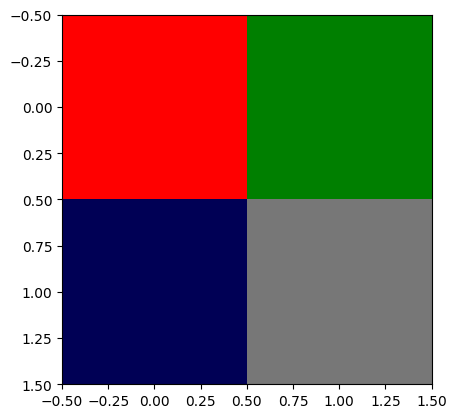

In [9]:
image = Image.open("../assets/rgb.png")
image = np.asarray(image)
plt.imshow(image)

### Encoding using unitary gate

In [13]:
circuit = geqie.encode(neqr.init_function, neqr.data_function, neqr.map_function, image)
circuit.draw(output='mpl')

AxisError: axis 2 is out of bounds for array of dimension 0

### Simulating the circuit

In [37]:
result = geqie.simulate(circuit, 1000)

## Interpretation of the results

Total state $\ket{\psi}$ is equal to:
$$\ket{\psi} = \ket{X\_ coordinates}^{log_2(x)}\otimes\ket{Y\_ coordinates}^{log_2(y)}\otimes\ket{color}^{\otimes 8}$$
Where:
- $\ket{X\_ coordinates}^{log_2(x)}$ and $\ket{Y\_ coordinates}^{log_2(y)}$ corresponds to X and Y positions encodings respectively,
- Last 8 qubits corresponds to color intensity, for example: $77 = \ket{01001101}$ (corresponds to $2^6+2^3+2^2+2^0$).

In [35]:
retrived_image = np.zeros_like(image)

for state, n in result.items():
    if n > 0:
        x = state[0:2]
        y = state[2:4]

        c = state[4:12]
        # print(f'x:{x}_y:{y}_c:{c}')

        x_dec = int(x, base=2)
        y_dec = int(y, base=2)
        c_dec = int(c, base=2)
        retrived_image[x_dec, y_dec] = c_dec


print('\nOriginal image:')
print(image)
print('Retrived image:')
print(f"{retrived_image}")



Original image:
[[255   0 255 127]
 [255   0   0 255]
 [195 255 255 255]
 [255 195   0 255]]
Retrived image:
[[255   0 255 127]
 [255   0   0 255]
 [195 255 255 255]
 [255 195   0 255]]


### Retrived image

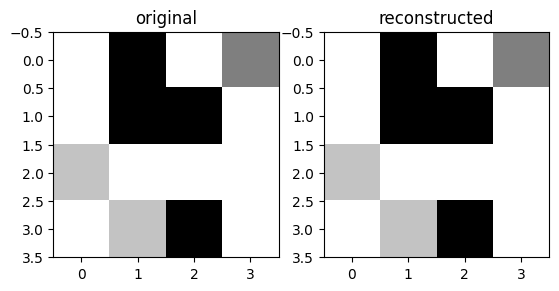

In [36]:
f = plt.figure()
gs = f.add_gridspec(1, 2)

ax = f.add_subplot(gs[0, 0])
ax.set_title("original")
ax.imshow(image, cmap='gray')

ax = f.add_subplot(gs[0, 1])
ax.set_title("reconstructed")
ax.imshow(retrived_image, cmap='gray')
